In [38]:
import pandas as pd
from scipy.stats import ttest_ind
import plotly.graph_objects as go
import statistics


In [2]:
genbank_phage = pd.read_csv('GenBank_phage/blast_filtered.tsv', sep='\t')

In [3]:
genbank_viral = pd.read_csv('GenBank_viral/blast_filtered.tsv', sep='\t')

In [4]:
IMG_VR = pd.read_csv('IMG_VR/blast_filtered.tsv', sep='\t')

In [6]:
df_EVADES_all_matches = pd.concat([genbank_phage, genbank_viral, IMG_VR])

In [8]:
df_EVADES_all_matches

,qseqid,sseqid,evalue,pident,qlen,slen,qstart,qend,sstart,send
0,pnk,CAA26792.1,0.000000e+00,100.000,301,301,1,301,1,301
1,pnk,CAM1377250.1,0.000000e+00,100.000,301,301,1,301,1,301
2,pnk,CAM1376987.1,0.000000e+00,100.000,301,301,1,301,1,301
3,pnk,QPI17447.1,0.000000e+00,100.000,301,301,1,301,1,301
4,pnk,AIT75404.1,0.000000e+00,100.000,301,301,1,301,1,301
...,...,...,...,...,...,...,...,...,...,...
39122,dnmp,IMGVR_UViG_3300008305_000003|3300008305|Ga0115...,2.180000e-17,31.148,241,224,3,238,2,220
39123,dnmp,IMGVR_UViG_3300006521_000001|3300006521|Ga0101...,2.180000e-17,31.148,241,224,3,238,2,220
39124,dnmp,IMGVR_UViG_2706796139_000001|2706796139|270870...,1.110000e-16,30.085,241,220,6,238,5,218
39125,dnmp,IMGVR_UViG_2706796049_000001|2706796049|270869...,1.110000e-16,30.085,241,220,6,238,5,218


In [9]:
triggers = ['orf58', 'acb2', 'riib', 'stp', 'ocr',
            'arn', 'arda', 'gam', 'gp5_9', 'dam']

In [14]:
non_triggers = list(set(df_EVADES_all_matches['qseqid'].unique()).difference(triggers))

In [21]:
df_EVADES_triggers = df_EVADES_all_matches[df_EVADES_all_matches['qseqid'].isin(triggers)]

In [18]:
df_EVADES_non_triggers = df_EVADES_all_matches[df_EVADES_all_matches['qseqid'].isin(non_triggers)]

In [25]:
nontriggers_counts = df_EVADES_non_triggers['qseqid'].value_counts()

In [24]:
triggers_counts = df_EVADES_triggers['qseqid'].value_counts()

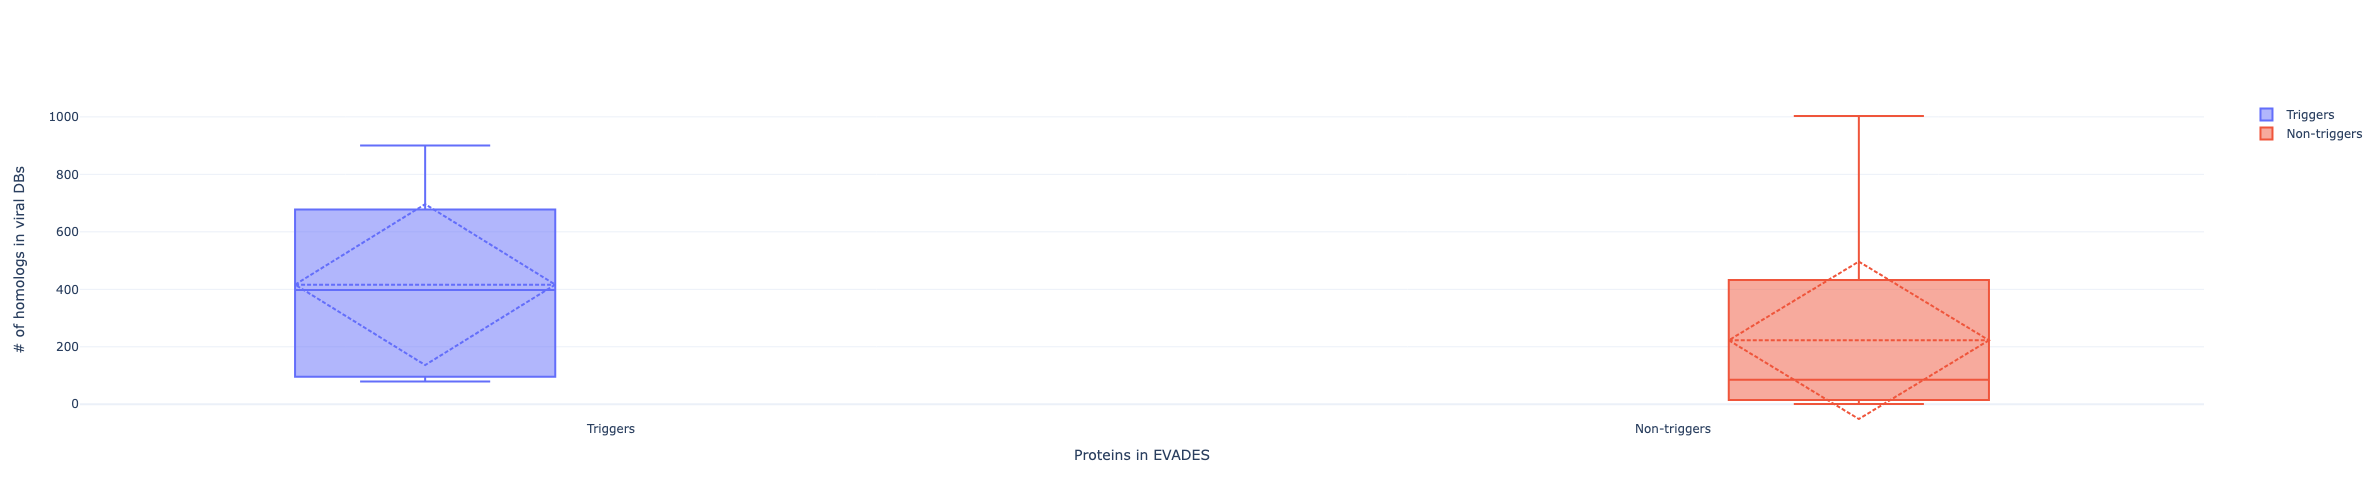

In [37]:
fig = go.Figure()

fig.add_trace(go.Box(y=triggers_counts, name="Triggers", boxmean='sd'))
fig.add_trace(go.Box(y=nontriggers_counts, name="Non-triggers", boxmean='sd'))

# Customize layout
fig.update_layout(
    title="",
    yaxis_title="# of homologs in viral DBs",
    xaxis_title="Proteins in EVADES",
    boxmode="group",
    template="plotly_white",
    width=450,   # set width in pixels
    height=500 
)

fig.show()
fig.write_image("../../Figures/Figure_3B.svg")


In [26]:
res = ttest_ind(nontriggers_counts, triggers_counts)
print(res)

Ttest_indResult(statistic=-2.1796031875538477, pvalue=0.03022421022146513)


In [47]:
median_nontriggers = statistics.mean(nontriggers_counts)
print(median_nontriggers)

222.6721991701245


In [48]:
median_triggers = statistics.mean(triggers_counts)
print(median_triggers)

416.3
